Prática de Histogramas

1-

*Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’c
*Com a imagem negativa, produza a imagem original novamente.
*Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
*Aplique a imagem uma função logarítmica.

Imagem Reconstruída, Imagem Negativa, Imagem após F. Logarítmica

Entre a original/reconstruída e a negativa, os objetos são melhor percebidos na imagem negativa pois...
...os valores mais próximos do preto se destacam mais no fundo branco do que o contrário.


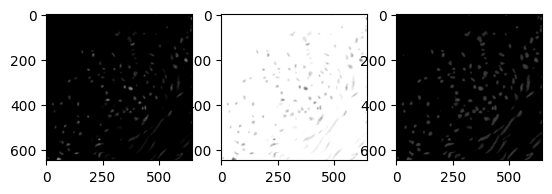

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

contrast = 10

#imagem original
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
#imagem negativa (inicialmente zerada)
img_neg = np.zeros(img.shape)
#imagem reconstruída (inicialmente zerada)
img_re = np.zeros(img.shape)
#imagem com função logarítmica (inicialmente zerada)
img_log = np.zeros(img.shape)

#Para cada píxel da imagem original...
#... sua versão negativa é "pintada" na matriz que armazenará a imagem negativa
        
img_neg = 255 - img
img_re = 255 - img_neg
img_log = contrast * np.log2(img_re + 1)
        
print("Imagem Reconstruída, Imagem Negativa, Imagem após F. Logarítmica")
print("")
print("Entre a original/reconstruída e a negativa, os objetos são melhor percebidos na imagem negativa pois...")
print("...os valores mais próximos do preto se destacam mais no fundo branco do que o contrário.")
plt.subplot(1, 3, 1)
plt.imshow(img_re, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(img_neg, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(img_log, cmap='gray', vmin=0, vmax=255)


2 -

*Abra a imagem 'pout.tif' e mostre seu histograma.
*Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)

(procurar função OpenCV)

Histograma Original (laranja) X Histograma Equalizado (azul)


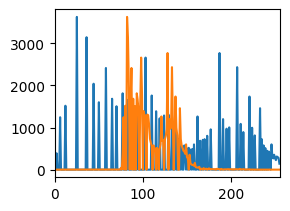

Imagem Original X Imagem Equalizada


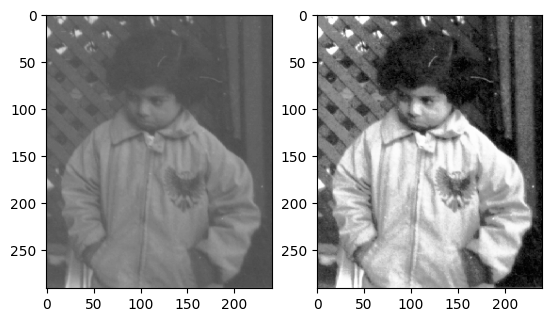

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
#Função que realiza a equalização de imagem de maneira direta.
eqz_img = cv2.equalizeHist(img)

#Gera o histograma tanto da imagem normal quanto da equalizada.
hist_norm = cv2.calcHist([img],[0],None,[256],[0,256])
hist_eqz = cv2.calcHist([eqz_img],[0],None,[256],[0,256])

print("Histograma Original (laranja) X Histograma Equalizado (azul)")
plt.subplot(221)
#Plota ambos os histogramas, um por cima do outro, á fim de comparação.
plt.plot(hist_eqz)
plt.plot(hist_norm)
plt.xlim([0,256])
plt.show()

print("Imagem Original X Imagem Equalizada")
plt.subplot(121) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(122) 
plt.imshow(eqz_img, cmap='gray', vmin=0, vmax=255)

3 - Implemente o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy.

*Aplique o mesmo algoritmo 2x na mesma imagem e compare os resultados.

Imagem Original X Imagem Equalizada X Imagem Equalizada +2x


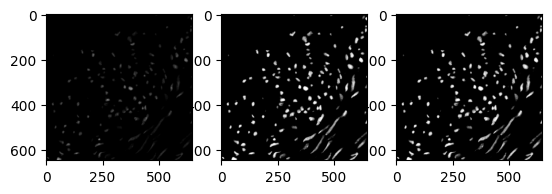

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def get_histogram(image, bins):
    image = image.flatten()     #Converte matriz em vetor, para processar a imagem.
    histogram = np.zeros(bins)
    
    for p in image:
        histogram[p] += 1
    
    return histogram

def equalizeImg(image, histogram):
    #realiza a soma acumulativa dos valores de pixel em um vetor.
    #cada posição do vetor equivale ao respectivo valor somado com todos os anteriores.
    a = iter(histogram)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
        
    #normaliza o resultado da soma (coloca os valores no intervalo [0, 255]).
    cs = np.array(b)
    cs = (((cs - cs.min()) * 255)/(cs.max() - cs.min())).astype('uint8')
    #utilizamos os valores do vetor para obter seus respectivos equivalentes da soma acumulativa.
    return np.reshape(cs[image.flatten()], image.shape)

img = np.asarray(cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE))

eqz_img1 = equalizeImg(img, get_histogram(img, 256))
eqz_img2 = equalizeImg(eqz_img1, get_histogram(eqz_img1, 256))
eqz_img3 = equalizeImg(eqz_img2, get_histogram(eqz_img2, 256))

print("Imagem Original X Imagem Equalizada X Imagem Equalizada +2x")
plt.subplot(131) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(132) 
plt.imshow(eqz_img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(133) 
plt.imshow(eqz_img3, cmap='gray', vmin=0, vmax=255)